Vidhi Kansara
Midterm
CWID:20029476

Q3: Load the “hepatitis_A.csv” dataset, from the Raw_data module in CANVAS, into Python (see the data dictionary at the bottom of this document). This is a dataset used for predicting “patient mortality”. Perform the EDA analysis by:
I.	Summarizing each numerical column (e.g., min, max, mean)
II.	Displaying scatter plots of “BILIRUBIN”,” SGOT” and “ALBUMIN” one pair at a time
III.	Showing box plots for columns “BILIRUBIN”,” SGOT” and “ALBUMIN”  	

In [ ]:
# VK_20029476
import pandas as pd

# Load the dataset
df = pd.read_csv('hepatitis_A.csv', na_values=['', ' ', 'NA', ',,'])

# Select numerical columns
numerical_cols = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN']
#summary = df[numerical_cols].agg(['min', 'max', 'mean']).round(2)
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
summary = df[numerical_cols].describe().loc[['min', 'max', 'mean']].round(2)
print("Summary Statistics for Numerical Columns:")
print(summary)

Summary Statistics for Numerical Columns:
       AGE  BILIRUBIN  ALK_PHOSPHATE    SGOT  ALBUMIN
min    7.0       0.30          26.00   14.00     2.10
max   78.0       8.00         295.00  648.00     6.40
mean  41.2       1.43         105.33   85.89     3.82


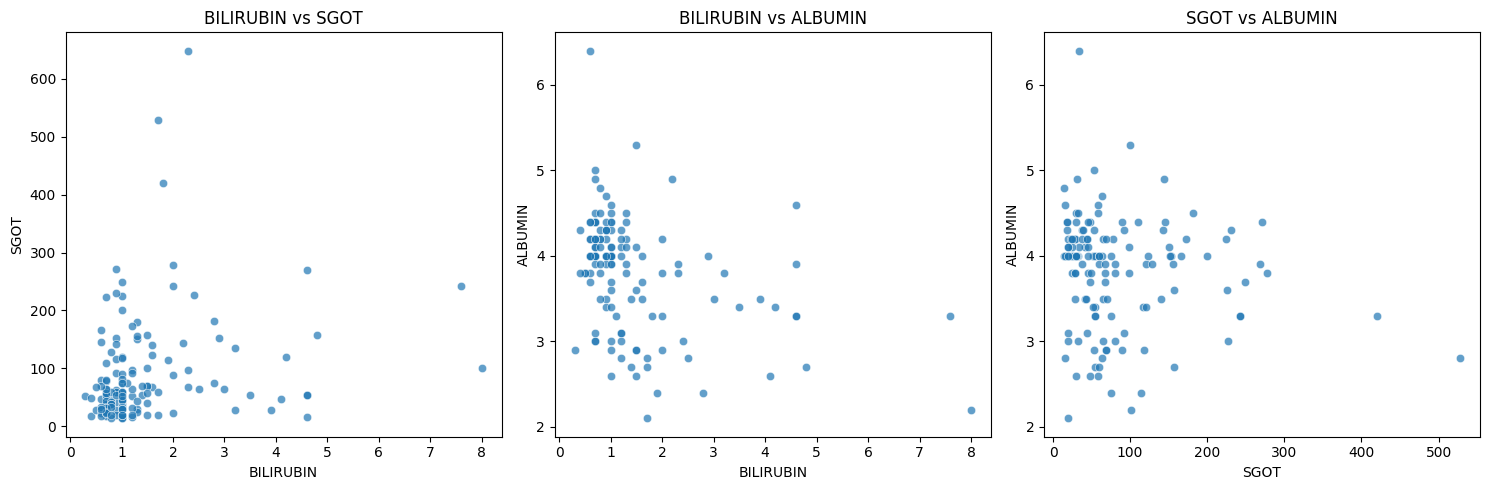

In [ ]:
# VK_20029476
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots
plt.figure(figsize=(15, 5))

# BILIRUBIN vs SGOT
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='BILIRUBIN', y='SGOT', alpha=0.7)
plt.title('BILIRUBIN vs SGOT')

# BILIRUBIN vs ALBUMIN
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='BILIRUBIN', y='ALBUMIN', alpha=0.7)
plt.title('BILIRUBIN vs ALBUMIN')

# SGOT vs ALBUMIN
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='SGOT', y='ALBUMIN', alpha=0.7)
plt.title('SGOT vs ALBUMIN')

plt.tight_layout()
plt.show()

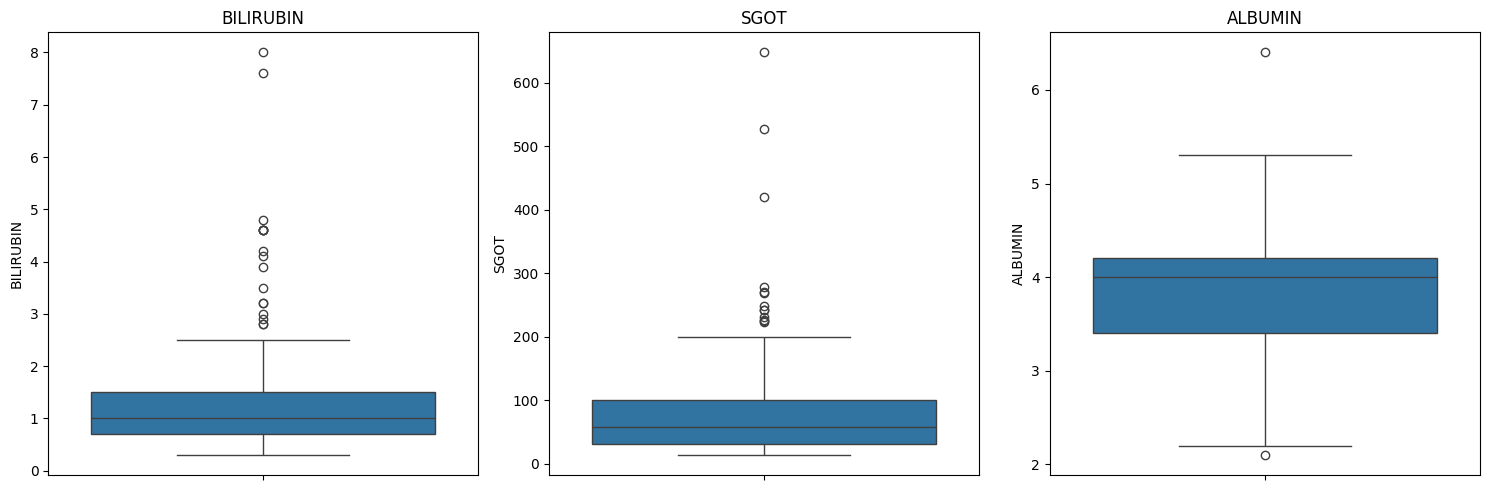

In [ ]:
# VK_20029476
plt.figure(figsize=(15, 5))

# Box plot for BILIRUBIN
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='BILIRUBIN')
plt.title('BILIRUBIN')

# Box plot for SGOT
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='SGOT')
plt.title('SGOT')

# Box plot for ALBUMIN
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='ALBUMIN')
plt.title('ALBUMIN')

plt.tight_layout()
plt.show()

Q4: Load the “hepatitis_A.csv” dataset, from the Raw_data module in CANVAS, into Python/R (Excel file containing another variation of the hepatitis dataset). This is a dataset used for predicting “patient mortality”.  Construct a CART model to classify “patient mortality” based only on the “SEX”,”Age_Quartile”, “STEROID”, “FATIGUE” and “MALAISE” attributes

Missing values before handling:
Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
 VARICES            5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
HISTOLOGY           0
Age_Quartile        0
dtype: int64
Missing values after handling:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64
Class distribution before SMOTE:
Class
2    123
1  

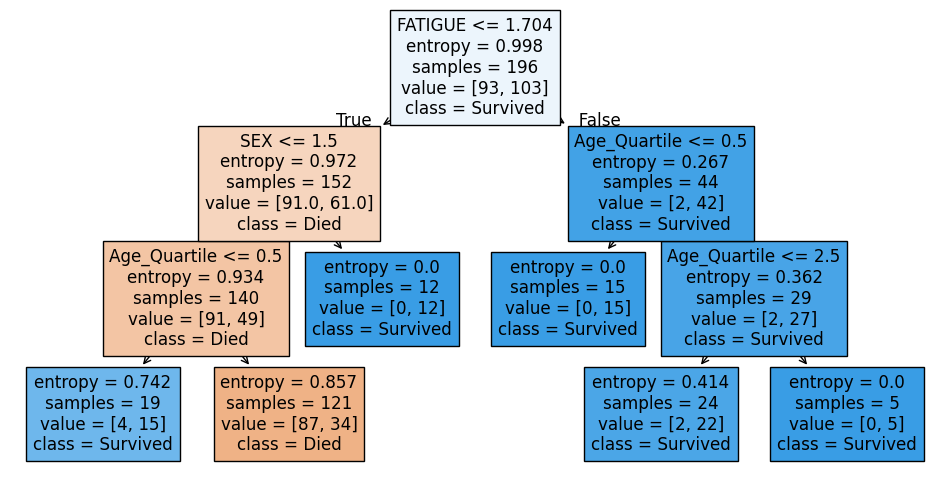

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("hepatitis_A.csv")  # Read the CSV file

# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Convert categorical 'Age_Quartile' to numeric (e.g., 'Q1' -> 1, 'Q2' -> 2, etc.)
data["Age_Quartile"] = data["Age_Quartile"].astype("category").cat.codes  # Convert quartiles to numeric

# Handling missing values: Impute with median for numeric columns (after conversion)
data.fillna(data.median(), inplace=True)

# Verify that missing values are handled
print("Missing values after handling:")
print(data.isnull().sum())

# Select relevant columns
features = ["SEX", "Age_Quartile", "STEROID", "FATIGUE", "MALAISE"]
target = "Class"  # Assuming "Class" represents patient mortality (1 = died, 2 = survived)

# Map target classes to labels (assuming Class is 1 = Died, 2 = Survived)
data[target] = data[target].map({1: "Died", 2: "Survived"})

# Drop rows with missing values in relevant columns (in case some remain)
data = data.dropna(subset=features + [target])

# Splitting dataset into train and test sets
X = data[features]
y = data[target]
y = y.map({"Died": 1, "Survived": 2})  # Convert target to numeric (1 = Died, 2 = Survived)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Splitting resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Building the CART model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Visualizing the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=features, class_names=["Died", "Survived"], filled=True)
plt.show()


Q5: Load the “hepatitis_B2.csv” dataset, from the Raw_data module in CANVAS, into Python. This is a variation of the hepatitis dataset used for predicting “Patient mortality”.  Construct a knn model to classify “patient death” based on only the AGE, SEX, ASCITES, BILIRUBIN, ALK_PHOSPHATE, SGOT, ALBUMIN attributes (K=1,3,5,7)

Dataset Preview:
   Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0      1   39    1        1           1        1        1         2   
1      1   37    1        2           2        1        2         2   
2      1   58    1        2           2        1        2         2   
3      1   30    1        2           2        1        1         1   
4      1   38    1        1           2        1        1         1   

   LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES   VARICES  \
0          2           1                2        2        2         2   
1          2           2                2        1        2         2   
2          1           1                1        1        2         2   
3          2           1                2        1        1         1   
4          2           1                2        1        1         1   

   BILIRUBIN  ALK_PHOSPHATE  SGOT  ALBUMIN  HISTOLOGY Age_Quartile  
0        2.3            280    98      3.8      

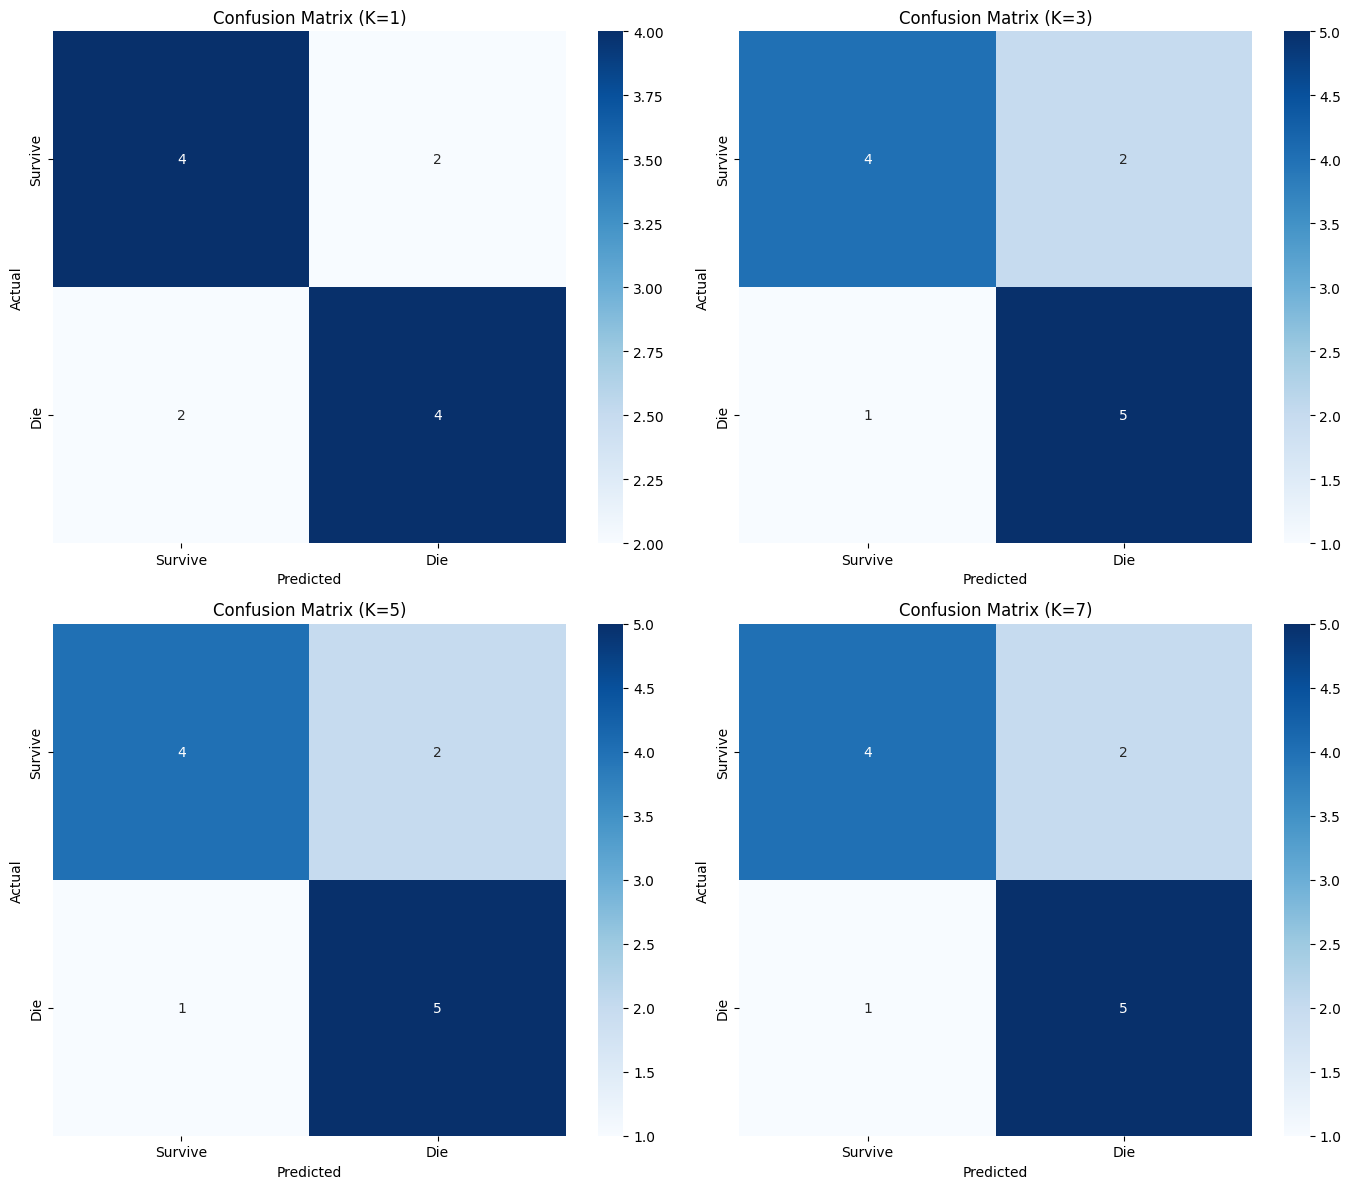

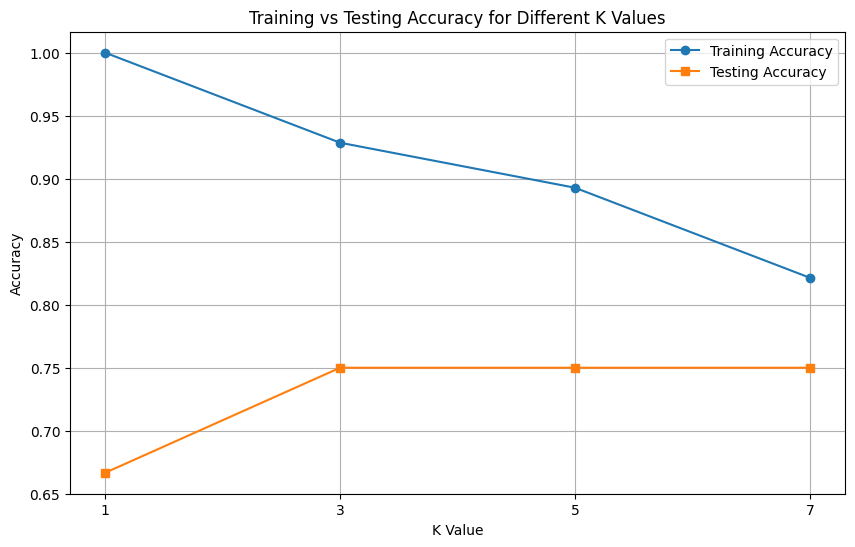



SUMMARY OF RESULTS
K     Training Accuracy    Testing Accuracy    
---------------------------------------------
1     1.0000               0.6667              
3     0.9286               0.7500              
5     0.8929               0.7500              
7     0.8214               0.7500              


In [ ]:
# VK_20029476
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("hepatitis_B2.csv")

print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Select only the required features
features = ['AGE', 'SEX', 'ASCITES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN']
X = df[features]
y = df['Class']  # Target variable - patient mortality

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of K values to test
k_values = [1, 3, 5, 7]
results = []
models = {}

# Create a figure for all confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Loop through each K value
for i, k in enumerate(k_values):
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    models[k] = knn
    
    # Make predictions on both training and test sets
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results.append((k, train_accuracy, test_accuracy))
    
    # Print detailed results
    print(f"\n{'='*50}")
    print(f"RESULTS FOR K={k}")
    print(f"{'='*50}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Survive', 'Die'], 
                yticklabels=['Survive', 'Die'],
                ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'Confusion Matrix (K={k})')

plt.tight_layout()
plt.show()

# Plot accuracy vs k for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in results], [r[1] for r in results], marker='o', label='Training Accuracy')
plt.plot([r[0] for r in results], [r[2] for r in results], marker='s', label='Testing Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different K Values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Summary table of results for all K values
print("\n\nSUMMARY OF RESULTS")
print("="*50)
print(f"{'K':<5} {'Training Accuracy':<20} {'Testing Accuracy':<20}")
print("-"*45)
for k, train_acc, test_acc in results:
    print(f"{k:<5} {train_acc:<20.4f} {test_acc:<20.4f}")